# Menentukan Kualitas Wine Antara Red Wine dan White Wine

Ini code dari hasil kelompok B yang terdiri dari:
1. Mohamad Bintang Jagad Raya (23283016)
2. Rokhmatulloh (23283033)

Berikut Code nya berawal dari:

# Import Library Python

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from termcolor import colored

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

warnings.filterwarnings('ignore')
print(colored('\nAll libraries imported successfully.', 'green'))


All libraries imported successfully.


# Load Dataset

In [2]:
df = pd.read_csv('D:\AI\Tugas AI - Kelompok B - Bintang n Rokhmat\wine+quality\winequality-red.csv', sep=';')
print(colored("Dataset loaded successfully!", "green"))

Dataset loaded successfully!


# Tampilkan beberapa data awal

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Korelasi antar fitur

In [4]:
correlation = df.corr()
quality_corr = correlation['quality'].drop('quality').sort_values(ascending=False)
print("\nKorelasi fitur terhadap kualitas:")
print(quality_corr)


Korelasi fitur terhadap kualitas:
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


# Visualisasi Korelasi terhadap kualitas

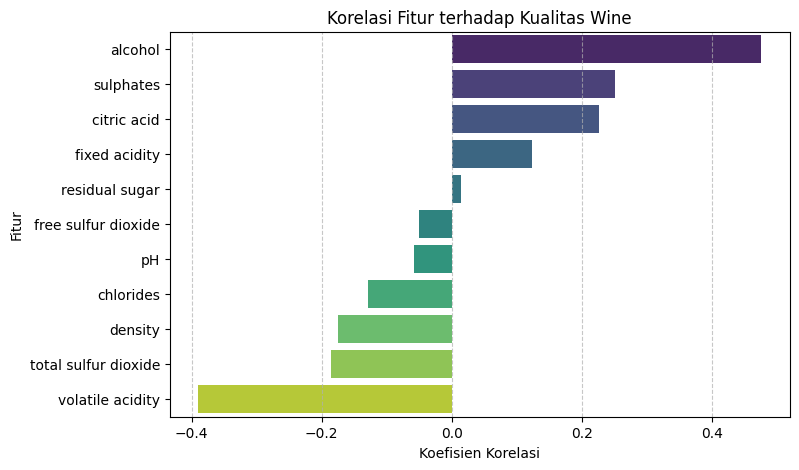

In [5]:
plt.figure(figsize=(8,5))
sns.barplot(x=quality_corr.values, y=quality_corr.index, palette='viridis')
plt.title('Korelasi Fitur terhadap Kualitas Wine')
plt.xlabel('Koefisien Korelasi')
plt.ylabel('Fitur')
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.show()

# Heatmap Korelasi

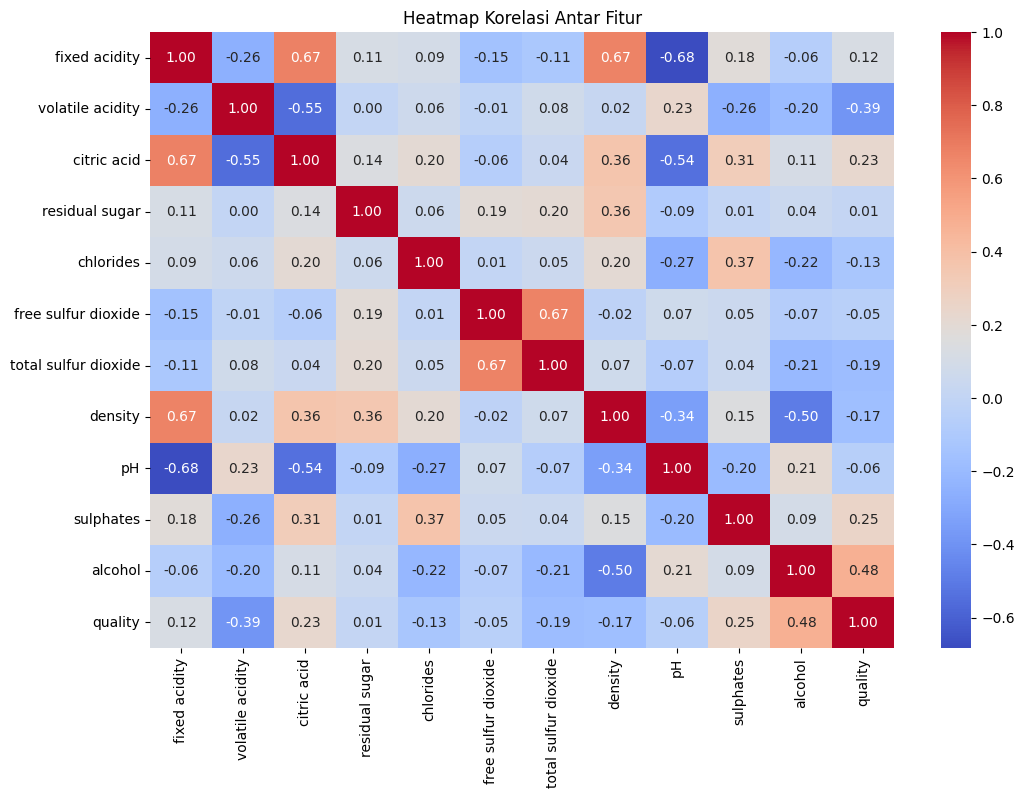

In [6]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi Antar Fitur')
plt.show()

# Visualisasi alkohol berdasarkan kualitas

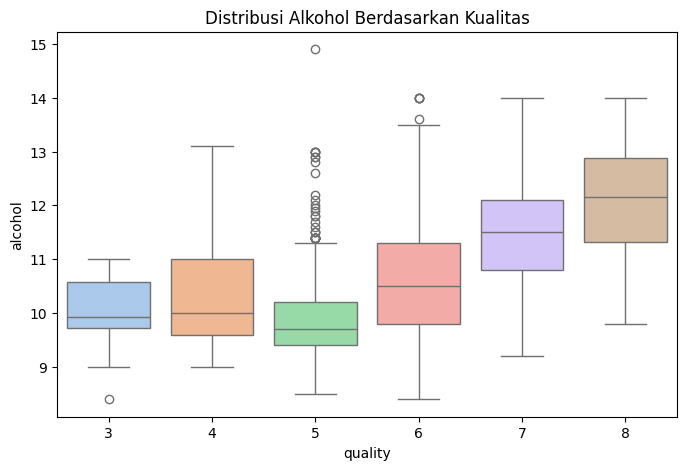

In [7]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='quality', y='alcohol', data=df, palette='pastel')
plt.title('Distribusi Alkohol Berdasarkan Kualitas')
plt.show()

# Pairplot fitur terpilih

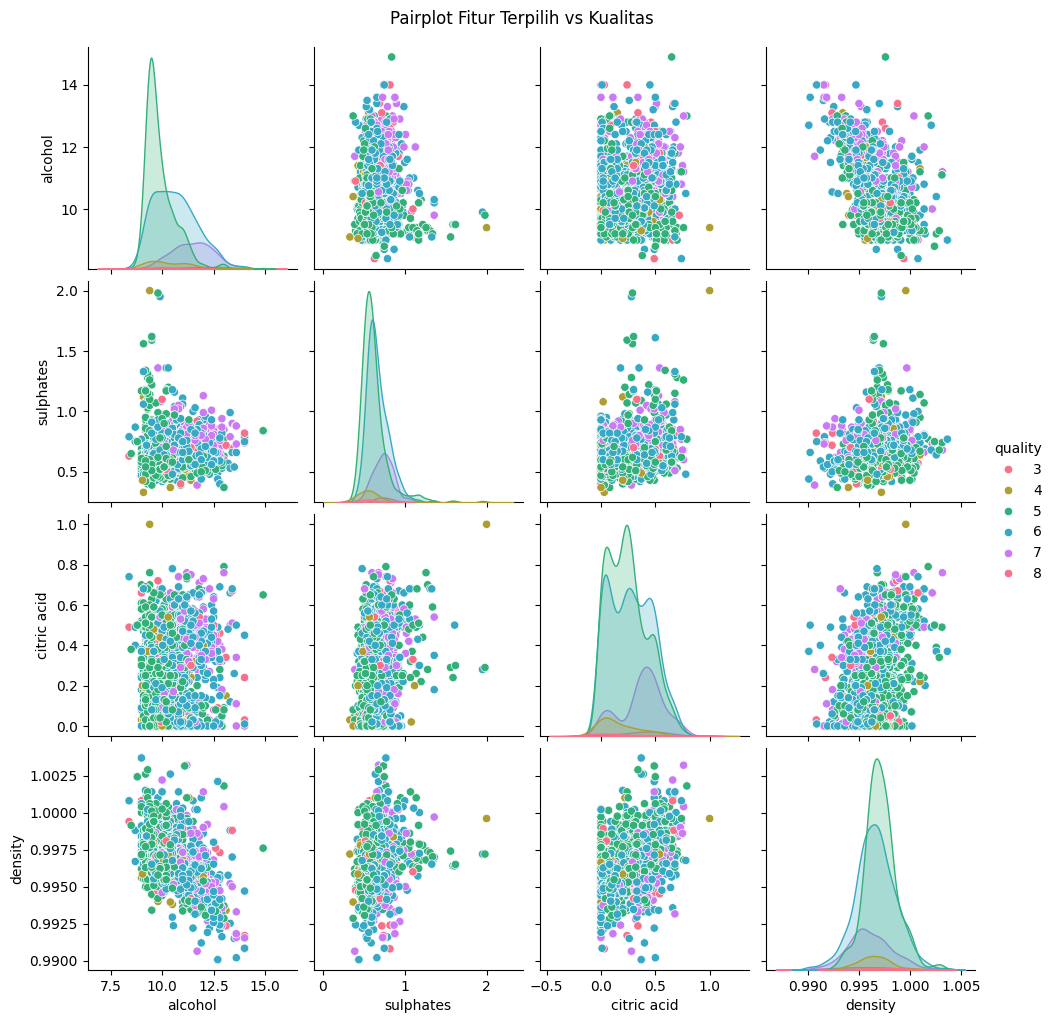

In [8]:
selected_features = ['alcohol', 'sulphates', 'citric acid', 'density', 'quality']
sns.pairplot(df[selected_features], hue='quality', palette='husl')
plt.suptitle('Pairplot Fitur Terpilih vs Kualitas', y=1.02)
plt.show()

# Distribusi kualitas

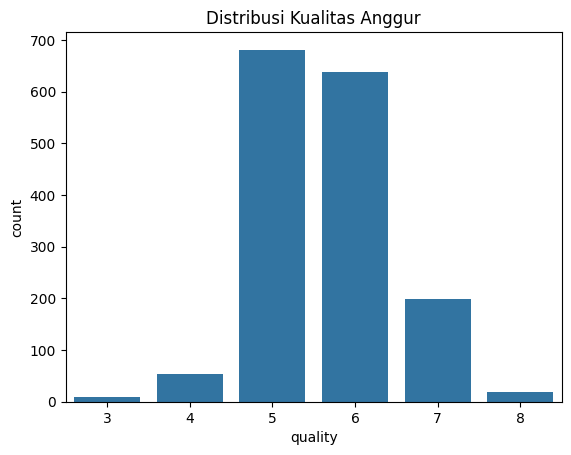

In [9]:
sns.countplot(x='quality', data=df)
plt.title('Distribusi Kualitas Anggur')
plt.show()

# Klasifikasi Biner: Baik (>=6) atau Buruk (<6)

In [10]:
df['quality_label'] = df['quality'].apply(lambda x: 1 if x >= 6 else 0)

X_bin = df.drop(['quality', 'quality_label'], axis=1)
y_bin = df['quality_label']

X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_bin, y_bin, test_size=0.2, random_state=42)

model_bin = RandomForestClassifier(n_estimators=100, random_state=42)
model_bin.fit(X_train_bin, y_train_bin)

y_pred_bin = model_bin.predict(X_test_bin)

print("=== Klasifikasi Biner ===")
print("Confusion Matrix:")
print(confusion_matrix(y_test_bin, y_pred_bin))

print("\nClassification Report:")
print(classification_report(y_test_bin, y_pred_bin))

=== Klasifikasi Biner ===
Confusion Matrix:
[[107  34]
 [ 33 146]]

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.76      0.76       141
           1       0.81      0.82      0.81       179

    accuracy                           0.79       320
   macro avg       0.79      0.79      0.79       320
weighted avg       0.79      0.79      0.79       320



# Pentingnya fitur dalam klasifikasi biner

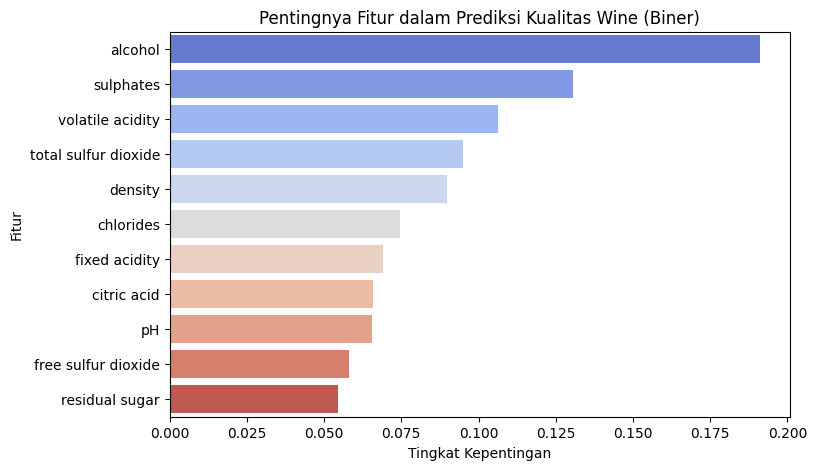

In [11]:
feature_importance_bin = pd.Series(model_bin.feature_importances_, index=X_bin.columns).sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importance_bin.values, y=feature_importance_bin.index, palette='coolwarm')
plt.title("Pentingnya Fitur dalam Prediksi Kualitas Wine (Biner)")
plt.xlabel("Tingkat Kepentingan")
plt.ylabel("Fitur")
plt.show()